**Problem** : The FBI Crime Investigation Project is a strategic initiative designed to harness the power of data analytics to predict crime patterns and improve public safety. In recent years, urban centers across the United States have faced challenges related to rising crime rates and the complex dynamics of crime occurrences. To address these issues effectively, law enforcement agencies require advanced tools and methodologies that enable them to anticipate crime trends, allocate resources strategically, and implement proactive measures to prevent criminal activities.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import datetime

In [3]:
# Dataset Loading
train = pd.read_excel("C:/Users/Anurag/Downloads/Train.xlsx")
test  = pd.read_csv("C:/Users/Anurag/Downloads/Test.csv")


In [4]:
# DataView
train.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [5]:
# Rows and Column Count
train.shape

(474565, 13)

In [6]:
#Dataset Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


In [7]:
# Check Duplicate
train.duplicated().sum()

44618

In [8]:
# Count of unique values in each column
for i in train.columns:
    print("The unique value of ",i,"is",train[i].unique().size)

The unique value of  TYPE is 9
The unique value of  HUNDRED_BLOCK is 20567
The unique value of  NEIGHBOURHOOD is 25
The unique value of  X is 84225
The unique value of  Y is 82768
The unique value of  Latitude is 89488
The unique value of  Longitude is 87190
The unique value of  HOUR is 25
The unique value of  MINUTE is 61
The unique value of  YEAR is 13
The unique value of  MONTH is 12
The unique value of  DAY is 31
The unique value of  Date is 4748


In [9]:
train.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


In [10]:
# drop duplicates
train.drop_duplicates(inplace=True)

In [11]:
# Check Null Values
train.isna().sum()

TYPE                0
HUNDRED_BLOCK      13
NEIGHBOURHOOD    6873
X                   0
Y                   0
Latitude            0
Longitude           0
HOUR             4747
MINUTE           4747
YEAR                0
MONTH               0
DAY                 0
Date                0
dtype: int64

In [12]:
train.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [13]:
# Year wise Crime 
train.groupby(by=['YEAR'])['YEAR'].count()

YEAR
1999    46744
2000    45797
2001    41203
2002    38300
2003    33602
2004    31519
2005    28620
2006    26302
2007    25042
2008    25776
2009    25736
2010    29844
2011    31462
Name: YEAR, dtype: int64

In [14]:
# Crime Types and their Count
train.groupby(by=['TYPE'])['YEAR'].count().sort_values()

TYPE
Offence Against a Person                                  4747
Vehicle Collision or Pedestrian Struck (with Injury)     19531
Theft of Bicycle                                         22110
Break and Enter Commercial                               30048
Theft of Vehicle                                         36189
Other Theft                                              43593
Break and Enter Residential/Other                        56564
Mischief                                                 63233
Theft from Vehicle                                      153932
Name: YEAR, dtype: int64

In [15]:
# Street Block where most of the Crime had occured
train.groupby(by=['HUNDRED_BLOCK'])['YEAR'].count().sort_values(). sort_values(ascending = False)[0:10]

HUNDRED_BLOCK
OFFSET TO PROTECT PRIVACY    4747
7XX GRANVILLE ST             4148
6XX GRANVILLE ST             2876
7XX W GEORGIA ST             2141
X NK_LOC ST                  2113
6XX W 41ST AVE               1686
17XX E BROADWAY AVE          1579
11XX ROBSON ST               1572
31XX GRANDVIEW HWY           1526
5XX RICHARDS ST              1297
Name: YEAR, dtype: int64

In [16]:
# Neighbourhood where most of the Crime had occured
train.groupby(by=['NEIGHBOURHOOD'])['YEAR'].count().sort_values(). sort_values(ascending = False)[0:10]

NEIGHBOURHOOD
Central Business District    96171
West End                     36954
Fairview                     29377
Mount Pleasant               26879
Grandview-Woodland           24333
Kitsilano                    24118
Renfrew-Collingwood          24092
Kensington-Cedar Cottage     22708
Strathcona                   18281
Hastings-Sunrise             16378
Name: YEAR, dtype: int64

In [17]:
# At which hour most of the crime occured
train.groupby(by=['HOUR'])['YEAR'].count().sort_values().sort_values(ascending=False)

HOUR
18.0    32413
17.0    28216
19.0    26310
22.0    25938
20.0    24704
21.0    24491
0.0     24333
16.0    23130
23.0    22261
15.0    21191
12.0    21185
14.0    18487
13.0    16351
9.0     14572
11.0    14196
8.0     14185
10.0    14082
1.0     11564
7.0      9623
2.0      9358
3.0      7863
6.0      7139
4.0      6999
5.0      6609
Name: YEAR, dtype: int64

In [18]:
# Month wise Crime
train.groupby(by=['MONTH'])['YEAR'].count().sort_values().sort_values(ascending=False)

MONTH
8     38439
10    37616
7     36956
9     36950
6     36638
5     36462
1     35487
11    35458
3     35378
4     34611
12    34080
2     31872
Name: YEAR, dtype: int64

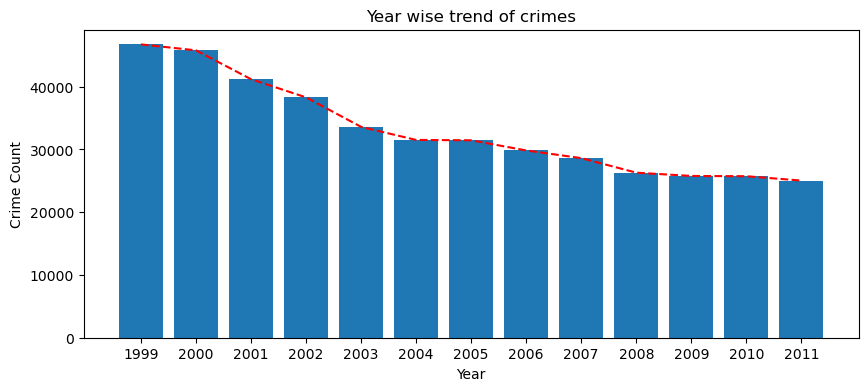

In [19]:
# Visualization of Number of Crimes with Year
plt.figure(figsize=(10, 4))
plt.title("Year wise trend of crimes")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.xticks([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011])
plt.bar(x=train['YEAR'].unique(),height=train['YEAR'].value_counts())
plt.plot(train['YEAR'].unique(),train['YEAR'].value_counts(), color='red', linestyle='--')
plt.show()

<Axes: title={'center': 'Top 10 Neighbourhoods having most crimes'}, xlabel='NEIGHBOURHOOD', ylabel='Crime Count'>

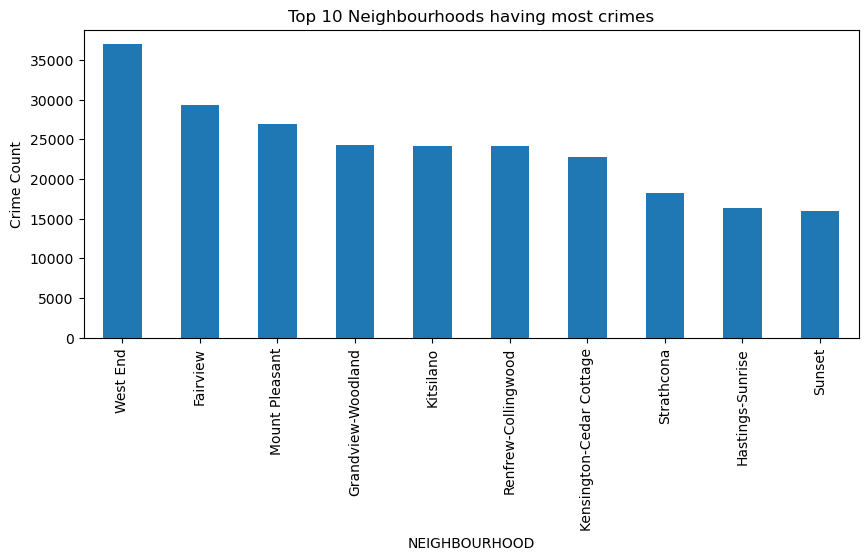

In [20]:
plt.figure(figsize=(10, 4))
plt.title('Top 10 Neighbourhoods having most crimes')
plt.xlabel('Neighbourhood')
plt.ylabel('Crime Count')
train.NEIGHBOURHOOD.value_counts()[1:11].plot(kind='bar')


In [21]:
train_1 = pd.DataFrame(train.groupby(by=['Date'])['TYPE'].count().sort_values().sort_values(ascending=False))

In [22]:
train_1

,TYPE
Date,
2007-06-15,615
1999-06-20,204
2004-03-12,201
2000-11-12,184
1999-05-16,183
...,...
2008-09-26,35
2005-12-16,31
2004-02-20,31


In [23]:
# Perform seasonal decomposition
result = seasonal_decompose(train_1['TYPE'], model='additive',period=1)

In [24]:
result.trend

Date
2007-06-15    615.0
1999-06-20    204.0
2004-03-12    201.0
2000-11-12    184.0
1999-05-16    183.0
              ...  
2008-09-26     35.0
2005-12-16     31.0
2004-02-20     31.0
2006-11-24     30.0
2006-04-21     25.0
Name: trend, Length: 4748, dtype: float64

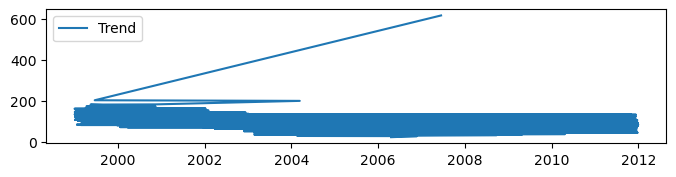

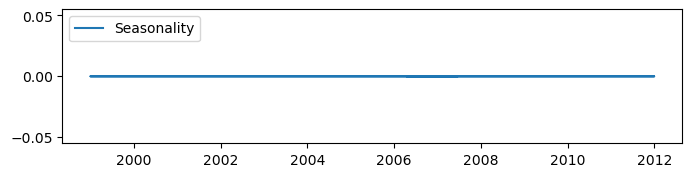

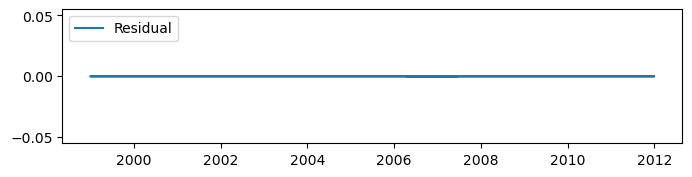

In [25]:
# Trend
plt.figure(figsize=(8, 8))
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonality
plt.figure(figsize=(8, 8))
plt.subplot(412)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

# Residual
plt.figure(figsize=(8, 8))
plt.subplot(412)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.show()

In [26]:
# Perform Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train_1['TYPE'])

print("p-value of ADF test is ", adf_test[1])




p-value of ADF test is  0.9987957051107432


In [27]:
# p-value greater than 0.05, so Null Hypothesis is being Rejected, which means data is stationary

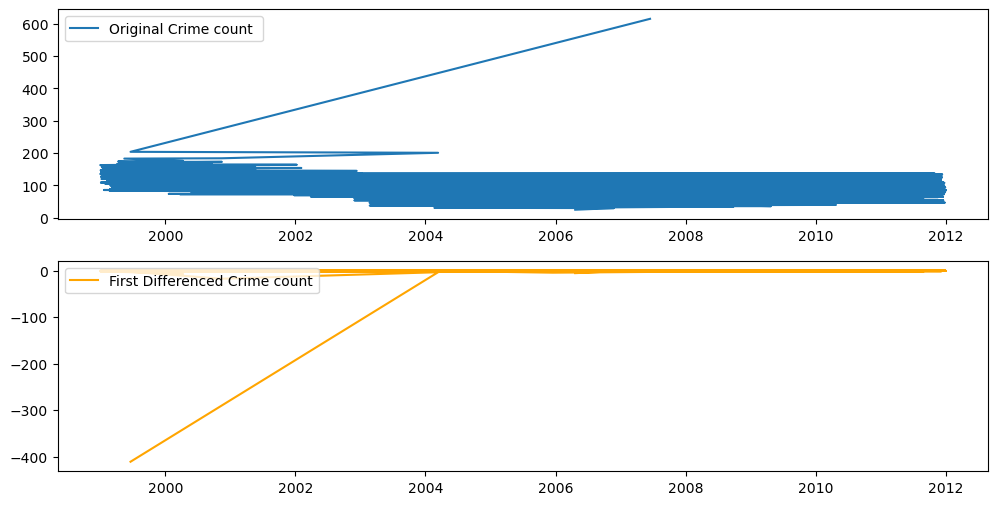

In [28]:
# Apply first differencing
crime_data_diff = train_1['TYPE'].diff().dropna()

# Plotting the original and differenced data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(train_1['TYPE'], label='Original Crime count ')
plt.legend(loc='upper left')
plt.subplot(2, 1, 2)
plt.plot(crime_data_diff, label='First Differenced Crime count', color='orange')
plt.legend(loc='upper left')
plt.show()

In [29]:
# check for stationarity again

# Perform Augmented Dickey-Fuller test
adf_test_first_diff = adfuller(crime_data_diff)

# Display the p-value
print("p-value of ADF test is", adf_test_first_diff[1])

p-value of ADF test is 0.08124408073345296


In [30]:
# It is still grerater than 0.05, so null hypothesis still being rejected at differencing 2

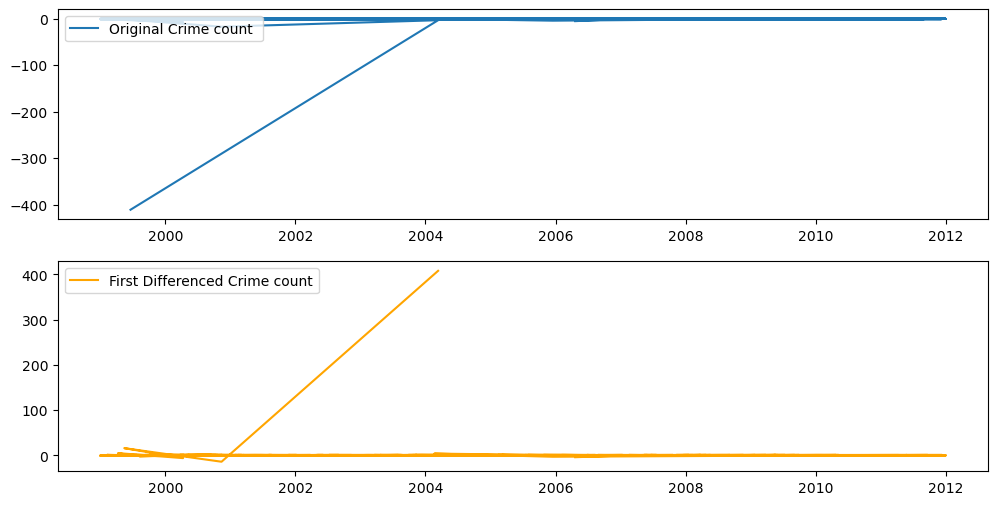

In [31]:
crime_data_d = crime_data_diff.diff().dropna()

# Plotting the original and differenced data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(crime_data_diff, label='Original Crime count ')
plt.legend(loc='upper left')
plt.subplot(2, 1, 2)
plt.plot(crime_data_d, label='First Differenced Crime count', color='orange')
plt.legend(loc='upper left')
plt.show()

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting the data into train and test sets
train = train_1['TYPE'].iloc[:-10]  # All data except the last 10 observations
test = train_1['TYPE'].iloc[-10:]  # Last 10 observations for testing

# Applying ARIMA model (choosing a simple (1,1,1) order for demonstration)
arima_model = ARIMA(train, order=(7, 1, 7))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=10)

D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index 

In [33]:
arima_mse = mean_squared_error(test, arima_forecast)

arima_mse

9.106426078354039

In [34]:
# Applying SARIMA model (considering a simple seasonal order)
sarima_model = SARIMAX(train_1, order=(7, 1, 7), seasonal_order=(1, 0, 1, 12))  # Yearly seasonality
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=10)

D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelih

In [36]:
# Evaluating the models
sarima_mse = mean_squared_error(test, sarima_forecast)

sarima_mse

28444.539809506496

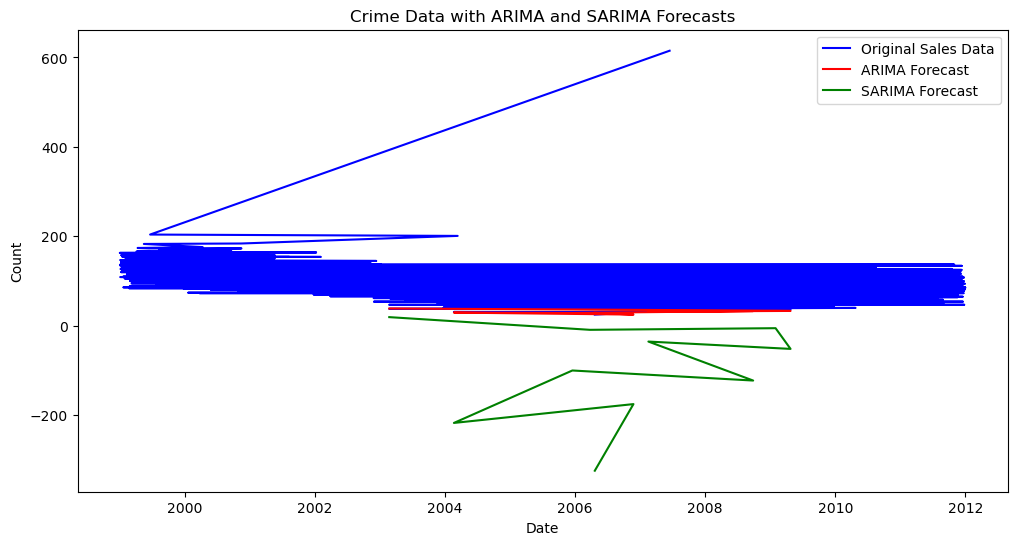

In [43]:
import matplotlib.pyplot as plt

# Re-plotting the forecasts along with the original data

plt.figure(figsize=(12, 6))
plt.plot(train_1['TYPE'], label='Original Sales Data', color='blue')
plt.plot(test.index,arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('Crime Data with ARIMA and SARIMA Forecasts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()